**DATA DICTONARY**
* Age: Age of the patient [years]
* Sex: Sex of the patient [M: Male, F: Female]
* ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: Resting blood pressure [mm Hg]
* Cholesterol: Serum cholesterol [mm/dl]
* FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
* Oldpeak: ST [Numeric value measured in depression]
* ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: Output class [1: heart disease, 0: Normal]

# Exploratory Data Analysis




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split,cross_validate,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_tree

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
print(f"""Percentage of patient had a HeartDisease:  {round(df.HeartDisease.value_counts(normalize=True)[1]*100,2)} %  --> ({df.HeartDisease.value_counts()[1]} patient)
Percentage of patient did not have a HeartDisease: {round(df.HeartDisease.value_counts(normalize=True)[0]*100,2)} %  --> ({df.HeartDisease.value_counts()[0]} patient)""")

Percentage of patient had a HeartDisease:  55.34 %  --> (508 patient)
Percentage of patient did not have a HeartDisease: 44.66 %  --> (410 patient)


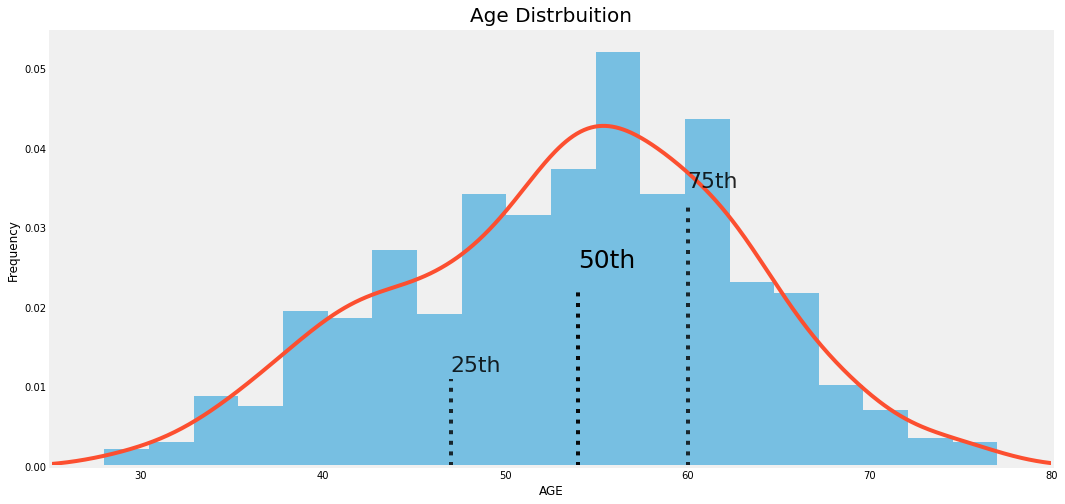

In [10]:
fig,ax = plt.subplots(figsize=(16,8))

df['Age'].plot(kind='hist',alpha=0.5,density=True,bins=20)
df['Age'].plot(kind='kde')

ax.set_xlabel('AGE')
ax.set_ylabel("Frequency")
ax.set_title('Age Distrbuition',size=20,pad=10)
ax.set_xlim(25,80)

quant25,quant50,quant75 = df['Age'].quantile(0.25),df['Age'].quantile(0.5),df['Age'].quantile(0.75)
quants = [[quant25,0.8,0.2],[quant50,0.95,0.4],[quant75,0.8,0.6]]
for i in quants:
    plt.axvline(x=i[0],alpha=i[1],ymax=i[2],linestyle=':',color='black')
    
ax.text(quant25, 0.012, "25th", size = 22, alpha = 0.85)
ax.text(quant50, 0.025, "50th", size = 25, alpha = 1)
ax.text(quant75, 0.035, "75th", size = 22, alpha = 0.85)

ax.grid(False)
plt.show()

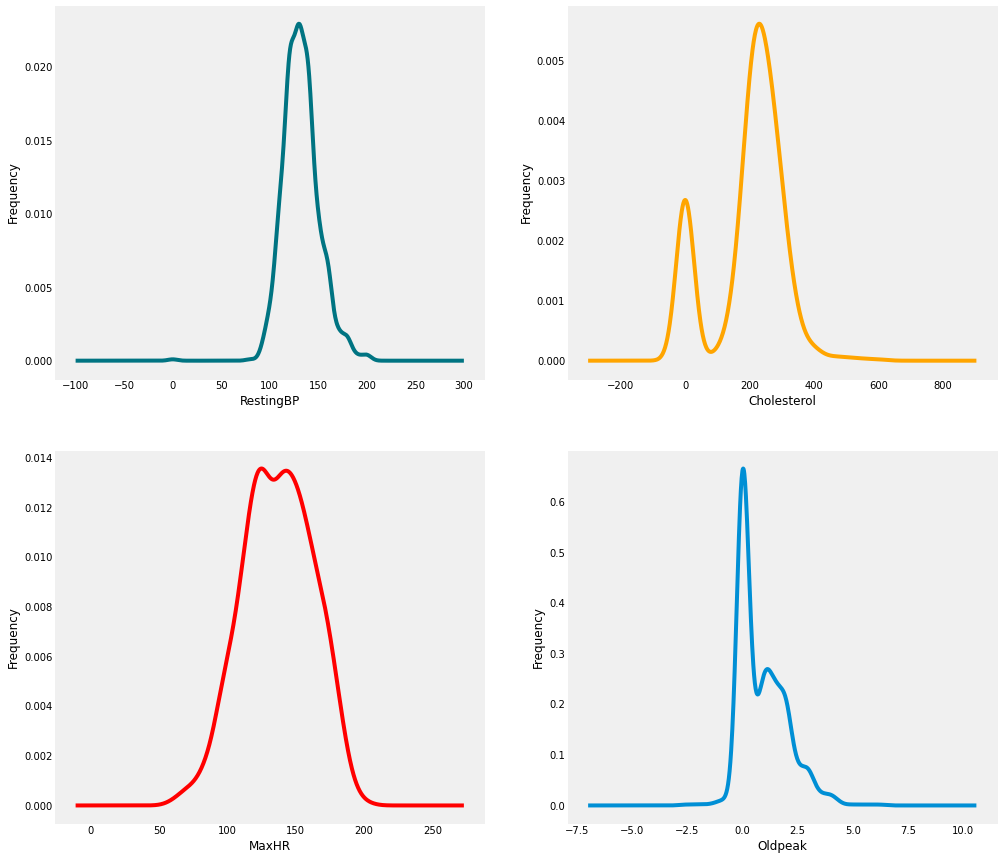

In [11]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
df['RestingBP'].plot(kind='density',color='#007482')
plt.xlabel('RestingBP')
plt.ylabel("Frequency")
plt.grid(False)

plt.subplot(2,2,2)
df['Cholesterol'].plot(kind='density',color='orange')
plt.xlabel('Cholesterol')
plt.ylabel("Frequency")
plt.grid(False)

plt.subplot(2,2,3)
df['MaxHR'].plot(kind='density',color='red')
plt.xlabel('MaxHR')
plt.ylabel("Frequency")
plt.grid(False)

plt.subplot(2,2,4)
df['Oldpeak'].plot(kind='density')
plt.xlabel('Oldpeak')
plt.ylabel("Frequency")
plt.grid(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

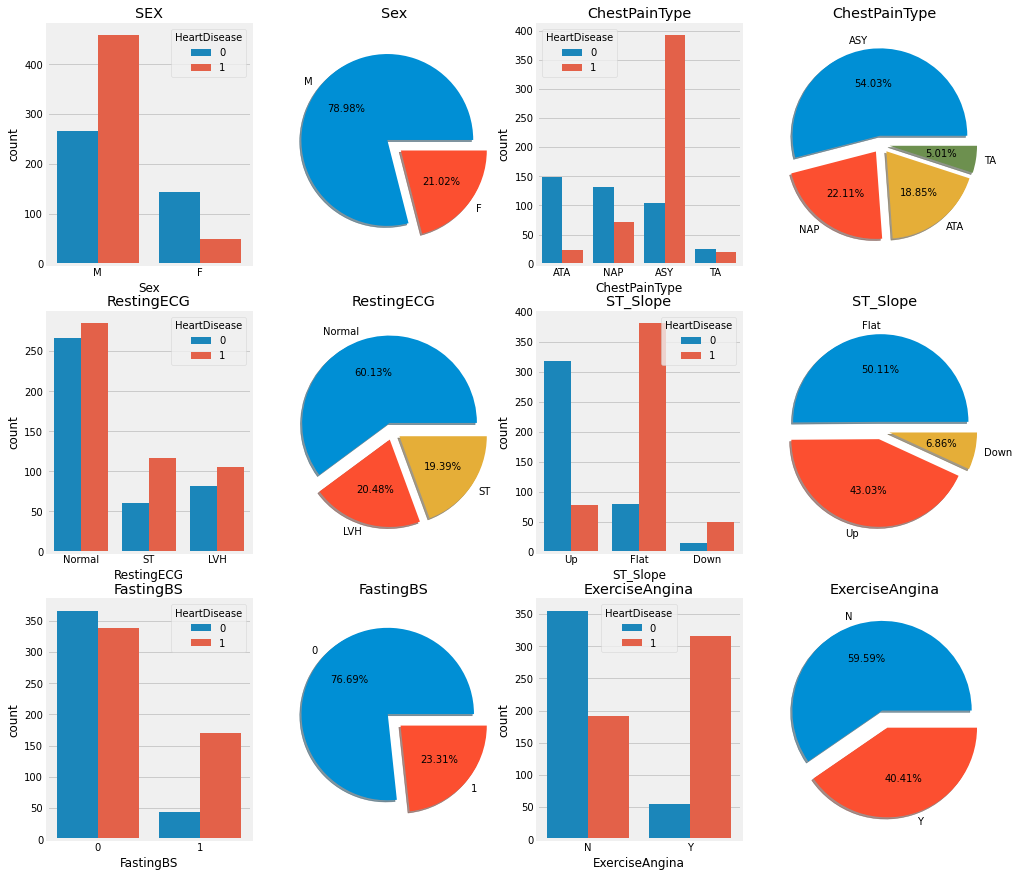

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(3,4,1)
sns.countplot(df.Sex,hue=df.HeartDisease)
plt.title('SEX') 

plt.subplot(3,4,2)
sex = df.Sex.value_counts()
plt.pie(sex,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=sex.index)
plt.title('Sex')
plt.axis('equal')

plt.subplot(3,4,3)
sns.countplot(df['ChestPainType'],hue=df.HeartDisease)
plt.title('ChestPainType') 

plt.subplot(3,4,4)
chest = df['ChestPainType'].value_counts()
plt.pie(chest,explode=[0.1,0.1,0.1,0.1],labels=chest.index,autopct='%.2f%%',shadow=True)
plt.title('ChestPainType')
plt.axis('equal')

plt.subplot(3,4,5)
sns.countplot(df['RestingECG'],hue=df.HeartDisease)
plt.title('RestingECG') 

plt.subplot(3,4,6)
ecg = df['RestingECG'].value_counts()
plt.pie(ecg,explode=[0.1,0.1,0.1],labels=ecg.index,autopct='%.2f%%',shadow=True)
plt.title('RestingECG')
plt.axis('equal')

plt.subplot(3,4,7)
sns.countplot(df.ST_Slope,hue=df.HeartDisease)
plt.title('ST_Slope') 

plt.subplot(3,4,8)
st = df.ST_Slope.value_counts()
plt.pie(st,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=st.index)
plt.title('ST_Slope')
plt.axis('equal')

plt.subplot(3,4,9)
sns.countplot(df['FastingBS'],hue=df.HeartDisease)
plt.title('FastingBS') 

plt.subplot(3,4,10)
fast = df['FastingBS'].value_counts()
plt.pie(fast,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=fast.index)
plt.title('FastingBS')
plt.axis('equal')

plt.subplot(3,4,11)
sns.countplot(df['ExerciseAngina'],hue=df.HeartDisease)
plt.title('ExerciseAngina')

plt.subplot(3,4,12)
ex =df['ExerciseAngina'].value_counts()
plt.pie(ex,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=ex.index)
plt.title('ExerciseAngina')
plt.axis('equal')

plt.show()

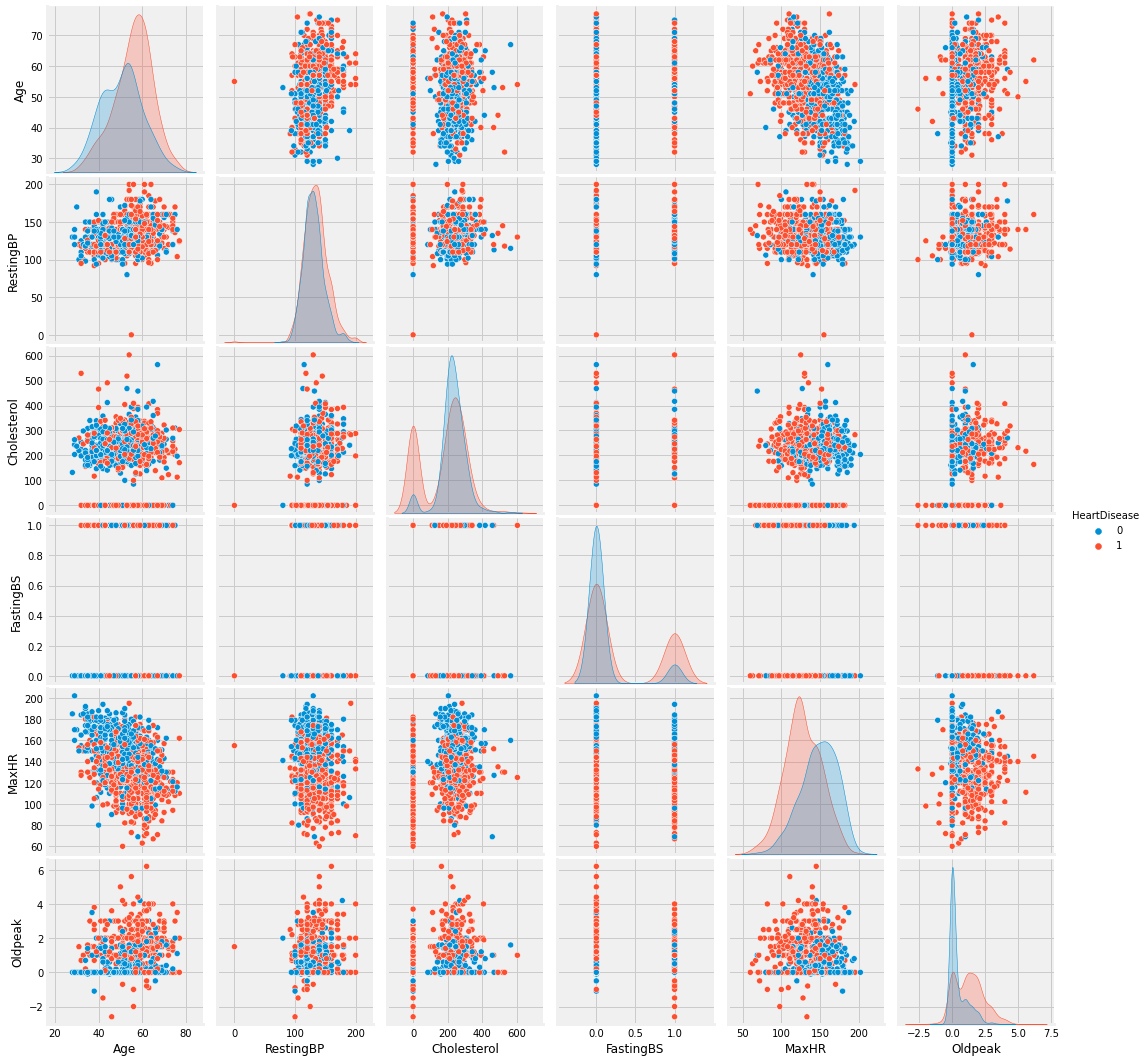

In [13]:
sns.pairplot(df,hue='HeartDisease')
plt.show()

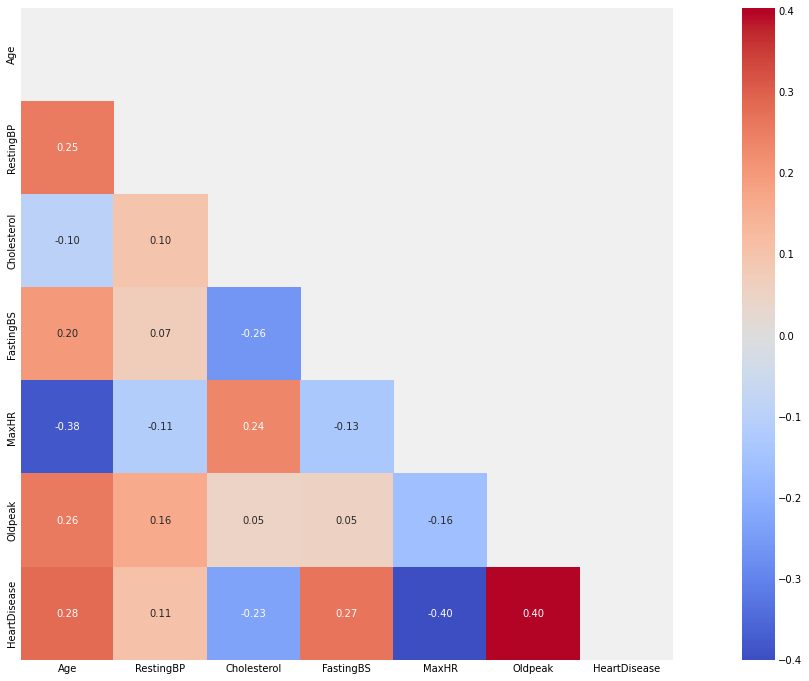

In [14]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

## preprocessing for Tree-Based Models

In [15]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [16]:
X_tree,y_tree=df_tree.drop('HeartDisease',axis=1),df_tree['HeartDisease']
xtree_train, xtree_test, ytree_train, ytree_test = train_test_split(X_tree, y_tree, test_size=0.3)

## Preprocessing for None Tree-Based Models

In [17]:
str_col = [col for col in df.columns if df[col].dtype=='object']
df_nontree = pd.get_dummies(df,columns=str_col,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [18]:
X_nontree,y_nontree=df_nontree.drop('HeartDisease',axis=1),df_nontree['HeartDisease']
xnontree_train, xnontree_test, ynontree_train, ynontree_test = train_test_split(X_nontree, y_nontree, test_size=0.3)

# Training our Machine Learning Model :

### NON-TREE BASED ALGORITHMS

***Logistic Regression***

In [19]:
kf = StratifiedKFold(n_splits=5)
log = make_pipeline(StandardScaler(),LogisticRegression())
log_score = cross_validate(log,X=xnontree_train,y=ynontree_train,cv=kf,scoring=['accuracy','roc_auc','recall','precision'])
log_score

{'fit_time': array([0.01618218, 0.01215124, 0.0127933 , 0.01267004, 0.01241207]),
 'score_time': array([0.01049423, 0.00996113, 0.01123333, 0.01005077, 0.0100801 ]),
 'test_accuracy': array([0.87596899, 0.86046512, 0.875     , 0.875     , 0.8671875 ]),
 'test_precision': array([0.89041096, 0.82352941, 0.89041096, 0.86842105, 0.89855072]),
 'test_recall': array([0.89041096, 0.95890411, 0.89041096, 0.91666667, 0.86111111]),
 'test_roc_auc': array([0.90973581, 0.88820939, 0.94321295, 0.94890873, 0.94295635])}

***SVM***

In [20]:
kf = StratifiedKFold(n_splits=5)
svc = make_pipeline(StandardScaler(),SVC())
svc_para_grid = {'svc__kernel':['linear', 'poly', 'rbf']}
svc_grid = GridSearchCV(svc,param_grid=svc_para_grid,cv=kf,scoring='accuracy',return_train_score=True,refit=True)
svc_grid.fit(X=xnontree_train,y=ynontree_train)
svc_score=cross_validate(svc_grid,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
svc_score

{'fit_time': array([0.28939509, 0.29969883, 0.30414367, 0.30323648, 0.3009584 ]),
 'score_time': array([0.01065874, 0.01082063, 0.01658201, 0.01094103, 0.01114798]),
 'test_accuracy': array([0.85271318, 0.86821705, 0.8828125 , 0.875     , 0.8359375 ]),
 'test_precision': array([0.83544304, 0.875     , 0.88888889, 0.85714286, 0.84722222]),
 'test_recall': array([0.91666667, 0.88732394, 0.90140845, 0.92957746, 0.85915493]),
 'test_roc_auc': array([0.93031189, 0.91330743, 0.94983939, 0.92908327, 0.86681492])}

***K-nearest Neighbors***

In [21]:
kf = StratifiedKFold(n_splits=5)
kn = make_pipeline(StandardScaler(),KNeighborsClassifier())
kn_para_grid = {'kneighborsclassifier__n_neighbors':[4,8,16,32,64,128]}
kn_grid = GridSearchCV(kn,param_grid=kn_para_grid,cv=kf,scoring='accuracy',return_train_score=True,refit=True)
kn_grid.fit(X=xnontree_train,y=ynontree_train)
kn_score=cross_validate(kn_grid,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
kn_score

{'fit_time': array([1.01316547, 0.94969821, 0.94555235, 0.97257614, 0.98086452]),
 'score_time': array([0.01580811, 0.01484704, 0.02085614, 0.01724625, 0.0156312 ]),
 'test_accuracy': array([0.82170543, 0.86046512, 0.828125  , 0.8671875 , 0.7890625 ]),
 'test_precision': array([0.87692308, 0.88405797, 0.90163934, 0.86486486, 0.82352941]),
 'test_recall': array([0.79166667, 0.85915493, 0.77464789, 0.90140845, 0.78873239]),
 'test_roc_auc': array([0.91374269, 0.91573579, 0.92834198, 0.93167779, 0.87805782])}

### TREE BASED ALGORITHMS


***Decission tree Classifier***

In [22]:
kf = StratifiedKFold(n_splits=5)
dtree = DecisionTreeClassifier()
dtree_score=cross_validate(dtree,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
dtree_score

{'fit_time': array([0.00698709, 0.00357103, 0.00345254, 0.0035069 , 0.00332427]),
 'score_time': array([0.00691652, 0.00557899, 0.00549269, 0.00547957, 0.00555849]),
 'test_accuracy': array([0.74418605, 0.78294574, 0.796875  , 0.7578125 , 0.734375  ]),
 'test_precision': array([0.76      , 0.79452055, 0.81690141, 0.8030303 , 0.76811594]),
 'test_recall': array([0.79166667, 0.81690141, 0.81690141, 0.74647887, 0.74647887]),
 'test_roc_auc': array([0.7379386 , 0.77914036, 0.79441562, 0.75920435, 0.73288856])}

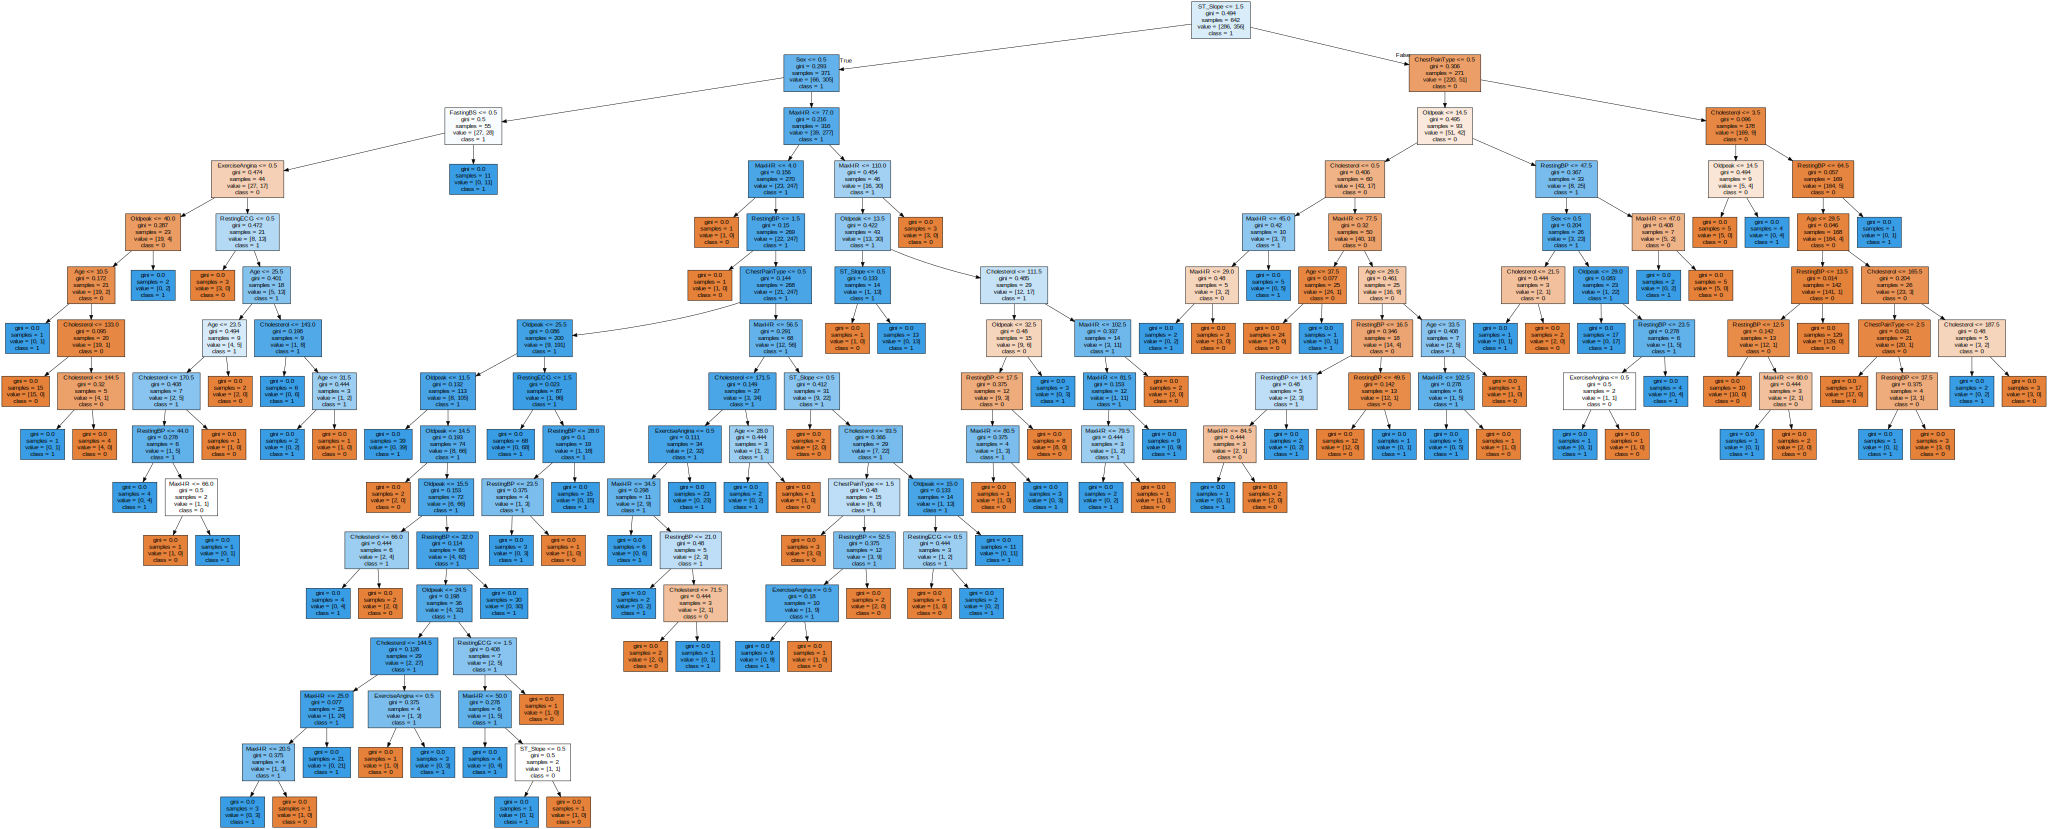

In [23]:
dtree = dtree.fit(xtree_train,ytree_train)
dot_data = export_graphviz(dtree,feature_names=xtree_train.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

***Random Forest Classifier***

In [24]:
kf = StratifiedKFold(n_splits=5)
rfor = RandomForestClassifier(n_estimators=200)
rfor_score = cross_validate(rfor,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
rfor_score

{'fit_time': array([0.39195609, 0.35764122, 0.35994792, 0.35169554, 0.34923315]),
 'score_time': array([0.05823779, 0.05493498, 0.05576324, 0.0550983 , 0.0609796 ]),
 'test_accuracy': array([0.87596899, 0.84496124, 0.8828125 , 0.859375  , 0.84375   ]),
 'test_precision': array([0.84146341, 0.84931507, 0.91176471, 0.83544304, 0.84931507]),
 'test_recall': array([0.95833333, 0.87323944, 0.87323944, 0.92957746, 0.87323944]),
 'test_roc_auc': array([0.93896199, 0.91476445, 0.94786261, 0.94119101, 0.87398073])}

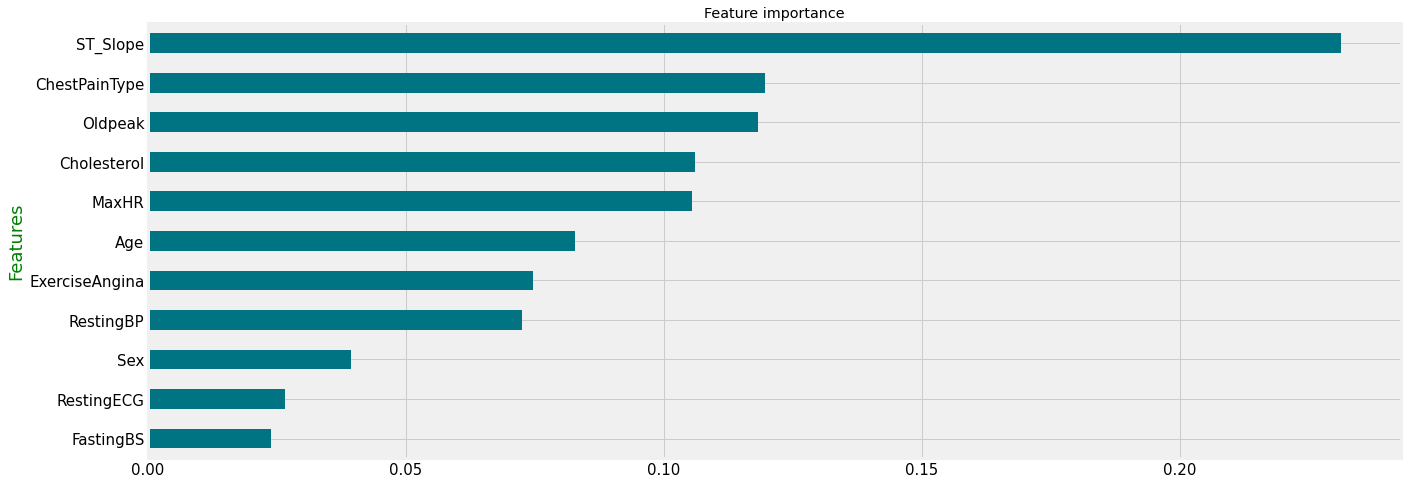

In [25]:
# Checking Feature importance 
rfor.fit(xtree_train,ytree_train)
importance = pd.Series(rfor.feature_importances_,index=xtree_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

***XGBoost***

In [26]:
kf = StratifiedKFold(n_splits=5)
xgb = XGBClassifier()
xgb_score = cross_validate(xgb,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
xgb_score

{'fit_time': array([0.13143015, 0.04853058, 0.03975773, 0.03957105, 0.04078197]),
 'score_time': array([0.00616717, 0.00611877, 0.00609183, 0.0065465 , 0.00688577]),
 'test_accuracy': array([0.89147287, 0.89147287, 0.8828125 , 0.8671875 , 0.828125  ]),
 'test_precision': array([0.87179487, 0.89041096, 0.88888889, 0.85526316, 0.84507042]),
 'test_recall': array([0.94444444, 0.91549296, 0.90140845, 0.91549296, 0.84507042]),
 'test_roc_auc': array([0.95248538, 0.92350656, 0.94983939, 0.9414381 , 0.88188782])}

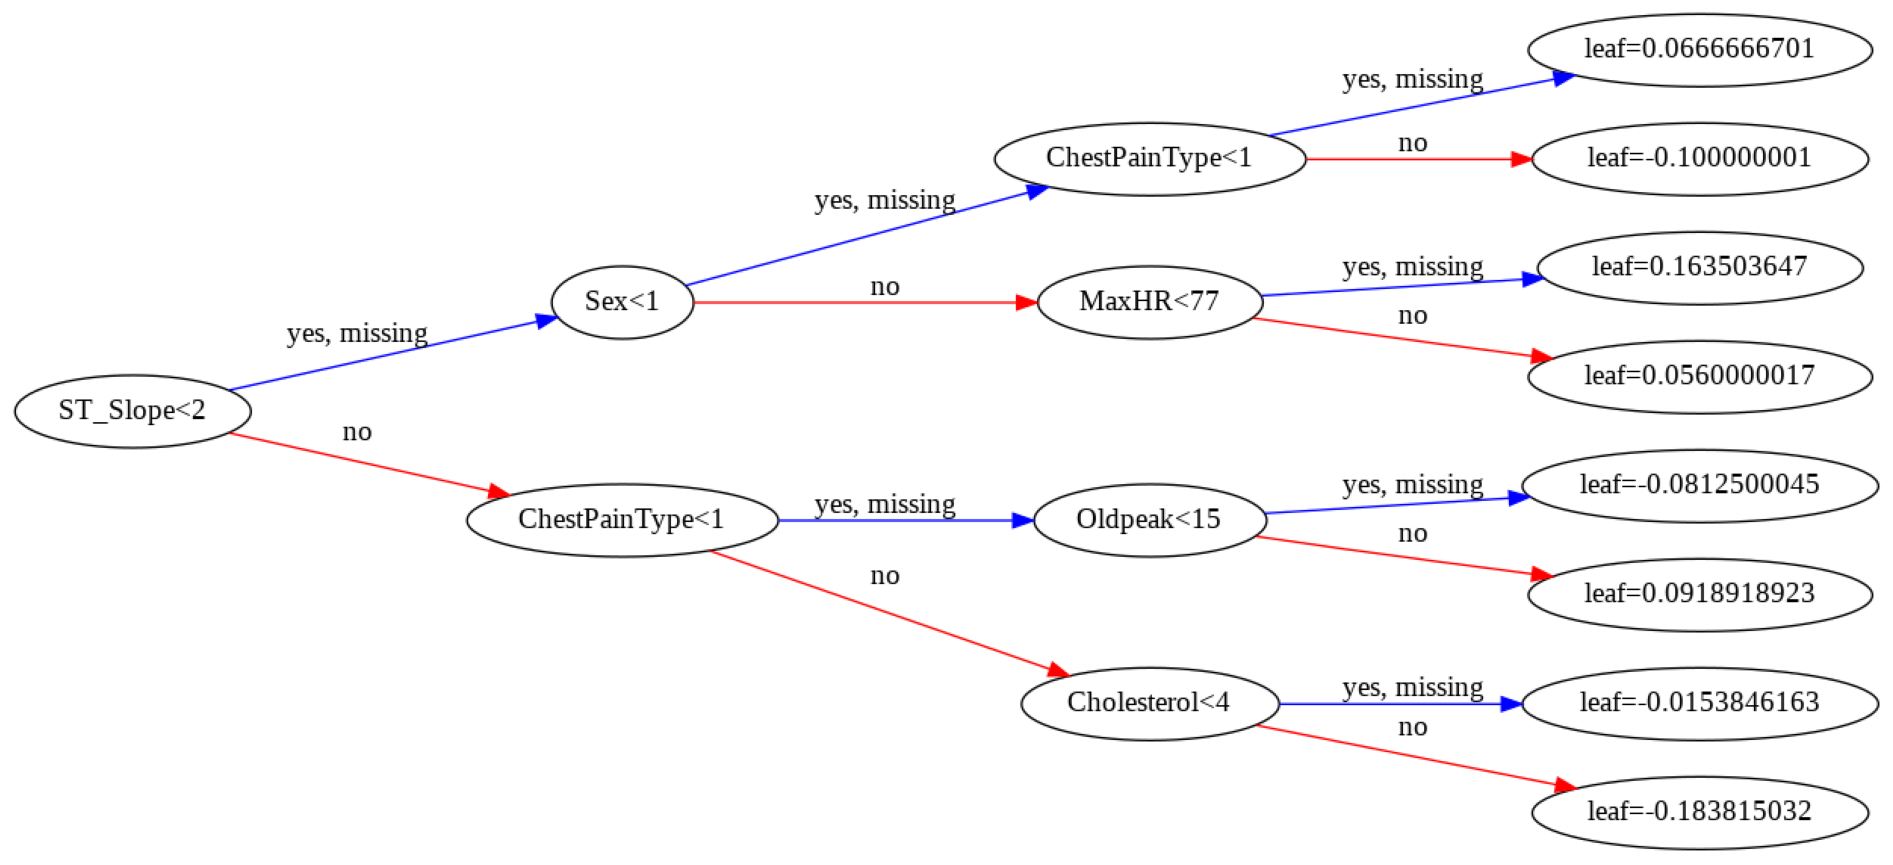

In [27]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.fit(xtree_train,ytree_train)
plot_tree(xgb,num_trees=0,rankdir="LR",ax=ax)
plt.show()

In [28]:
log_score = pd.DataFrame(log_score).mean()
svc_score = pd.DataFrame(svc_score).mean()
kn_score = pd.DataFrame(kn_score).mean()
dtree_score = pd.DataFrame(dtree_score).mean()
rfor_score = pd.DataFrame(rfor_score).mean()
xgb_score = pd.DataFrame(xgb_score).mean()

models_score = pd.DataFrame(index=['LogisticRegression','SVC','KNN','DTree','RForest','XGBClassifier'],
                        data= [log_score,svc_score,kn_score,dtree_score,rfor_score,xgb_score])
models_score

,fit_time,score_time,test_accuracy,test_roc_auc,test_recall,test_precision
LogisticRegression,0.013242,0.010364,0.870724,0.926605,0.903501,0.874265
SVC,0.299486,0.012030,0.862936,0.917871,0.898826,0.860739
KNN,0.972371,0.016878,0.833309,0.913511,0.823122,0.870203
DTree,0.004168,0.005805,0.763239,0.760717,0.783685,0.788514
RForest,0.362095,0.057003,0.861374,0.923352,0.901526,0.857460
XGBClassifier,0.060014,0.006362,0.872214,0.929831,0.904382,0.870286
